## Group Study 
- Ranveer Singh
- Anindita Das
- Submitted On : 08-06-2022

# Problem statement
- Based on given Dataset, we want to collect risk stats
- based on Risk stats we want to decide if new Applicant is safe to lend money or not

In [25]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_row', 500)
import matplotlib.pyplot as plt
import seaborn as sns

# loan.csv file location
filePath = "../resources/"

# read raw files
loanDf = pd.read_csv(filePath+"loan.csv")
loanStatsDf = pd.read_excel(filePath+"Data_Dictionary.xlsx", sheet_name="LoanStats")
rejectStatsDf = pd.read_excel(filePath+"Data_Dictionary.xlsx", sheet_name="RejectStats")

# Check data load and count
loanDf.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [26]:
# Get the sape of Dataframe
loanDf.shape

(39717, 111)

In [27]:
loanDf.nunique().sort_values()

# No need to perfrom remove duplciatesbased on Uniue ID

verification_status_joint             0
bc_util                               0
bc_open_to_buy                        0
avg_cur_bal                           0
acc_open_past_24mths                  0
inq_last_12m                          0
total_cu_tl                           0
inq_fi                                0
total_rev_hi_lim                      0
all_util                              0
max_bal_bc                            0
mo_sin_old_il_acct                    0
open_rv_24m                           0
il_util                               0
total_bal_il                          0
mths_since_rcnt_il                    0
open_il_24m                           0
open_il_12m                           0
open_il_6m                            0
open_acc_6m                           0
tot_cur_bal                           0
tot_coll_amt                          0
total_bc_limit                        0
open_rv_12m                           0
mo_sin_old_rev_tl_op                  0


In [28]:
# Remove empty and single value from DF
loanDf = loanDf.dropna(axis=1, how="all")
# New shape, 54 columns were having all null values, new shape is
loanDf.shape

(39717, 57)

In [29]:
pd.set_option('display.max_row', 500)
loanDf.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [30]:
loanDf.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

## Data Analysis

#### 1. loan_status == 'Charged Off' vs funded_amnt_inv'
- Most of the funded income is present in 3rd quartile, Median or average of funded amount  exists in 3rd quartile 


{'whiskers': [<matplotlib.lines.Line2D at 0x269a2349250>,
 'caps': [<matplotlib.lines.Line2D at 0x269a23497f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x269a233cf40>],
 'medians': [<matplotlib.lines.Line2D at 0x269a2349d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x269a2dd70a0>],
 'means': []}

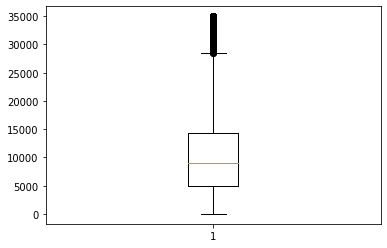

In [40]:
plt.boxplot(loanDf.funded_amnt_inv) 

#### 2. Charged Off' vs installment Boxplot
- Most of the installment and average median of installments lies in 1st and 2nd quartile. 

{'whiskers': [<matplotlib.lines.Line2D at 0x269a2e26d60>,
 'caps': [<matplotlib.lines.Line2D at 0x269a2e37340>,
 'boxes': [<matplotlib.lines.Line2D at 0x269a2e26a90>],
 'medians': [<matplotlib.lines.Line2D at 0x269a2e378e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x269a2e37bb0>],
 'means': []}

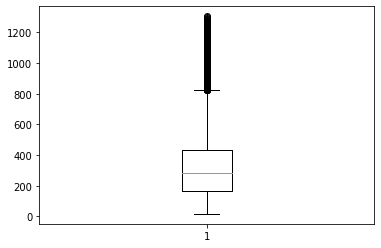

In [42]:
plt.boxplot(loanDf.installment)  

#### 3. loan amount vs membership
- correlation is positive . Hence increment and decrement is directly proportional.

In [31]:
## Manipute data which is required for further charts
loanDf['amnt_groups'] = pd.cut(loanDf['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-300k'])
loanDf['inc_groups'] = pd.cut(loanDf['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loanDf.emp_length.fillna(loanDf.emp_length.mode()[0], inplace = True)
loanDf.emp_length = pd.to_numeric(loanDf.emp_length.apply(lambda x: 0 if "<" in str(x) else (str(x).split('+')[0] if "+" in str(x) else str(x).split()[0])))

## univariate analysis
### Goal : Create graphs for bwlow items
- loan_status == 'Charged Off' vs loan_amnt
- loan_status == 'Charged Off' vs emp_length
- loan_status == 'Charged Off' vs annual_incM
- loan_status == 'Charged Off' vs verification_status
- loan_status == 'Charged Off' vs home_ownership
- loan_status == 'Charged Off' vs pymnt_plan
- loan_status == 'Charged Off' vs purpose

<AxesSubplot:xlabel='amnt_groups', ylabel='count'>

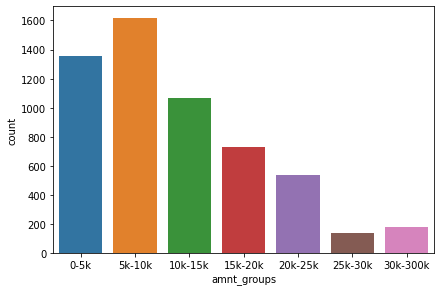

In [32]:
#1
# loan_status == 'Charged Off' vs loan_amnt
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='amnt_groups', data=loanDf[loanDf.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='emp_length', ylabel='count'>

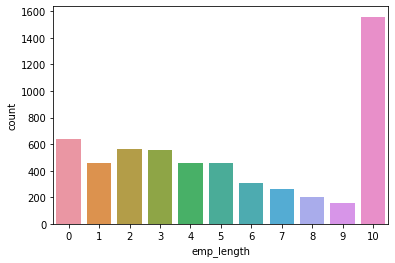

In [33]:
#2
# loan_status == 'Charged Off' vs emp_length
sns.countplot(x='emp_length', data=loanDf[loanDf.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='inc_groups', ylabel='count'>

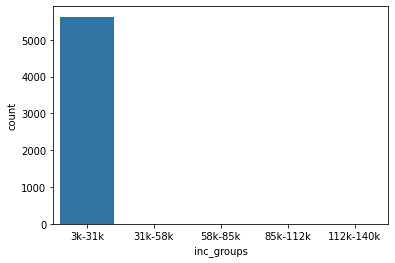

In [34]:
#3
# loan_status == 'Charged Off' vs annual_inc
sns.countplot(x='inc_groups', data=loanDf[loanDf.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='verification_status', ylabel='count'>

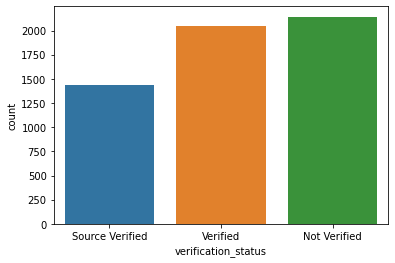

In [35]:
#4
# loan_status == 'Charged Off' vs verification_status
sns.countplot(x='verification_status', data=loanDf[loanDf['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

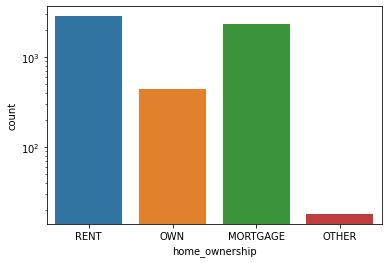

In [36]:
#5
# loan_status == 'Charged Off' vs home_ownership
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loanDf[loanDf['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='count', ylabel='purpose'>

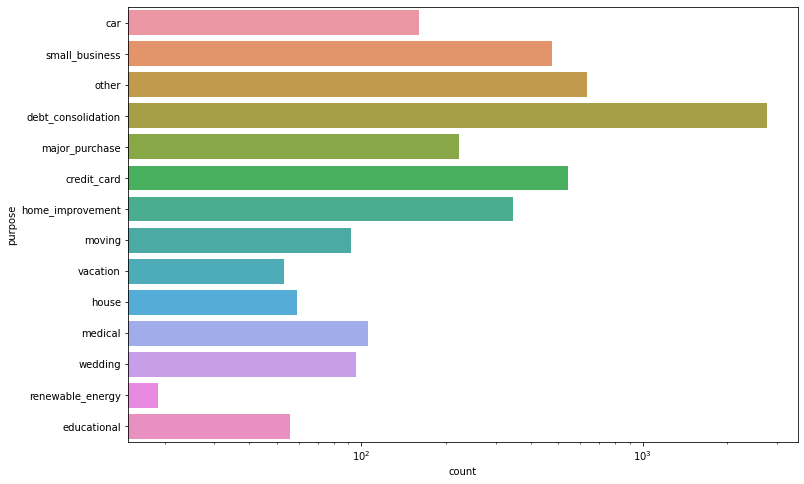

In [37]:
#6
# loan_status == 'Charged Off' vs purpose
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loanDf[loanDf.loan_status == 'Charged Off'])

# Bivirant Analysis
- home_ownership, annual_inc and loan_status
- inc_groups, loan_amnt and loan_status

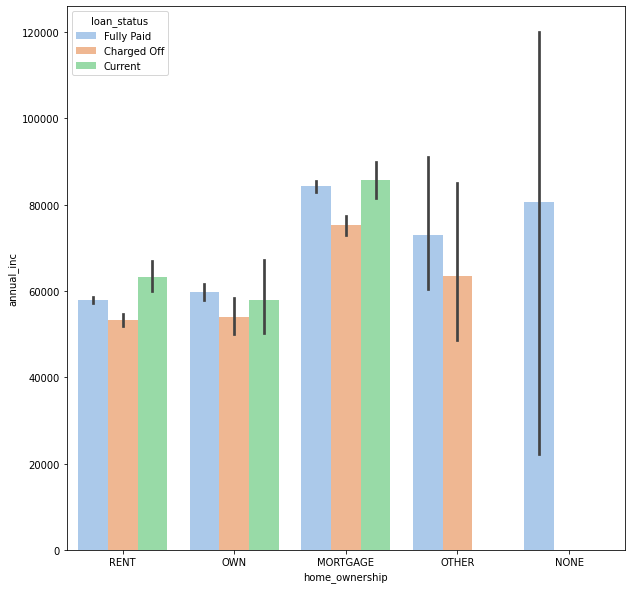

In [38]:
#7
plt.figure(figsize=(10,10))
sns.barplot(data =loanDf,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

<AxesSubplot:xlabel='inc_groups', ylabel='loan_amnt'>

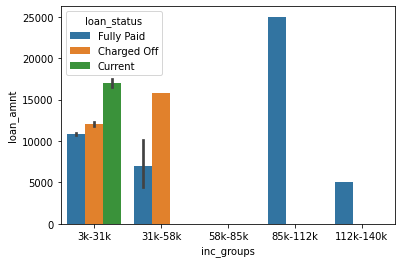

In [39]:
#8
sns.barplot(x = "inc_groups", y = "loan_amnt", hue = 'loan_status', data = loanDf)

# Observations
- #1 : Applicant between 5k-10k is more defaulter than others
- #2 : Applicant with 10 years and more are most defaulters
- #3 : Applicant in income group less then 31K are most defaulters
- #4 : Applicant verification doesn’t give much concreate outcome on defaulter
- #5 : Applicant owns house are less defaulter than others
- #6 : Applicant with debt consolidation is the most defaulter whereas renewable energy are least
- #8 : Applicant income greater than 58K does not deafault.